# **DATA SCIENCE ENGG METHODS**

Assignment 1 - ML Data Cleaning and Feature Selection

** Link to Dataset :  https://github.com/NitishBelagaliNEU/DataScienceAssignment **




In this assignment, you will use a dataset for predictive learning and check the quality of the data and determine which features are important.

Answer the following questions:

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

For categorical data, calculate the accuracy and a confusion matrix.



There is an example notebook for assignment one here

 https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynbLinks to an external site.

Imputation Methods for Missing Data
https://www.youtube.com/watch?v=fYhr8eF1uboLinks to an external site.

Nice EDA notebook https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-pythonLinks to an external site.



# Abstarct

In this comprehensive notebook, we leverage a variety of data preprocessing and machine learning techniques to effectively manage and optimize features in the Adult Census Income dataset. With socio-economic attributes such as education, marital status, and age, our goal is binary classification, predicting whether an individual's annual income exceeds or falls below $50,000. The analysis encompasses thorough data examination, including preprocessing steps, handling missing values, and deploying diverse machine learning models. Addressing data imbalance is a crucial aspect, prompting the use of the Synthetic Minority Over-sampling Technique (SMOTE) for oversampling. Additionally, various visualizations, such as bar plots, histograms, pair plots, and statistical representations, contribute to a nuanced understanding of data distributions. This notebook reflects the application of data science engineering methods to tackle a real-world machine learning challenge.

## Dataset

The following dataset consist of mainly:

1. There are 15 total columns, mixture of both categorical and numerical.
2. There are 9 categoric columns and 6 numeric columns

The categoric columns are:

a. workclass

b. education

c. marital.status

d. occupation

e. relationship

f. race

g. sex

h. native.country

i. income


The numerical columns are:

a. age

b. fnlwgt

c. education.num

d. capital.gain

e. capital.loss

f. hours.per.week


3. The following dataset contains 32561 records.
4. The dependent variable in this context is income, categorized into two types: <=50k and >50k. This dichotomy establishes a binary classification problem.

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline

In [3]:
# reading dataset by providing the url of the git repo where the data is present
#URL to the raw CSV file in the GitHub repository
url = 'https://raw.githubusercontent.com/NitishBelagaliNEU/DataScienceAssignment/main/adult%202.csv'

# To read CSV file into Pandas DataFrame
df=pd.read_csv(url)

#Now 'df' has a data in csv format
#displaying first 5 rows of the data

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Display total number of rows and columns
df.shape

(32561, 15)

In [5]:
# Displaying the data types of all the columns

df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)


['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


Q1: What are the data types? (Only numeric and categorical)

Ans: As mentioned above, we can see that there are 9 categorical and 6 numerical columns

### Categorical columns:

a. workclass

b. education

c. marital.status

d. occupation

e. relationship

f. race

g. sex

h. native.country

i. income

### Numerical columns:

a. age

b. fnlwgt

c. education.num

d. capital.gain

e. capital.loss

f. hours.per.week

**Missing Values**

In [7]:
# checking for missing values

df.isnull()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Upon examining the missing values output, it appears that there are none. However, upon inspecting the first 5 rows of the dataset, there are instances where values are represented by '?'. Let's determine the count of such values in the dataset.

In [9]:
# displaying the number of rows in columns with '?'

count =(df == '?').sum()
print(count)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [10]:
# counting the number of values having '?' in the dataset
count = (df=='?').sum().sum()
print(count)

4262


In [11]:
# Replace '?' with nan to count and identify missing values and printing them
# if we replcae missng values with nan, isnull() func can detect the null values
df.replace('?', np.nan, inplace=True)
df.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [12]:
result = 1836 + 1843 + 583
print((result/32561)*100)

13.08927858481005


From the provided output, we can observe that three columns have missing values:

workclass: This column, indicating the working class of the individual (e.g., fed-gov, self-employed, private), has 1836 missing values.

occupation: This column, representing the occupation of the person, has 1843 missing values.

native.country: This column, containing information about the country of origin of the individual, has 583 missing values.

Considering the dataset's total size of 32,561 entries, the missing values in these three columns collectively account for approximately 5% of the dataset. While these missing values are present, their proportion remains relatively insignificant in the overall dataset.

In [13]:
# plotting the missing values according to percentages for better visualization
missing_percentage = (df.isnull().mean() * 100).round(2)
print(missing_percentage)

age               0.00
workclass         5.64
fnlwgt            0.00
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.66
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.79
income            0.00
dtype: float64


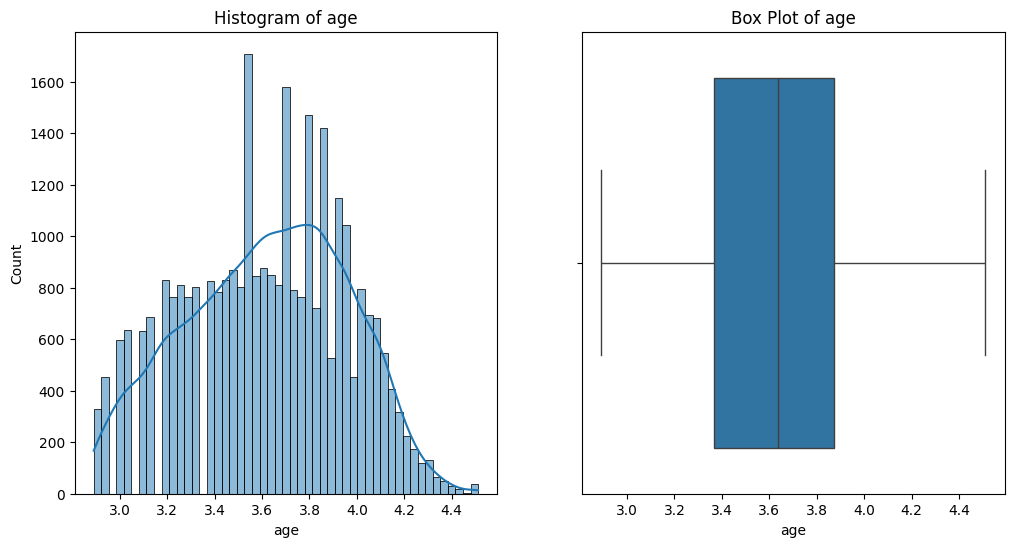

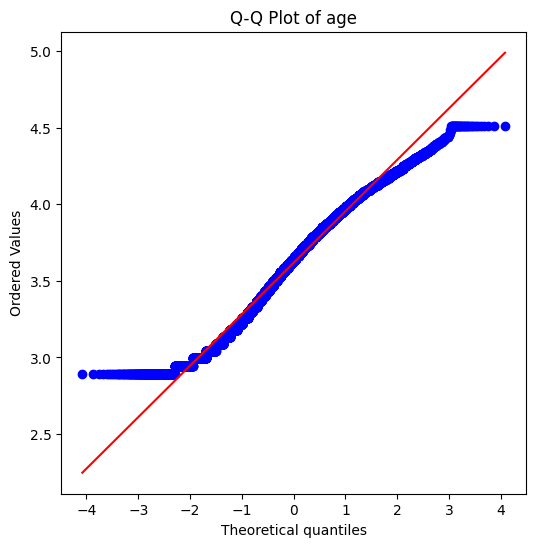

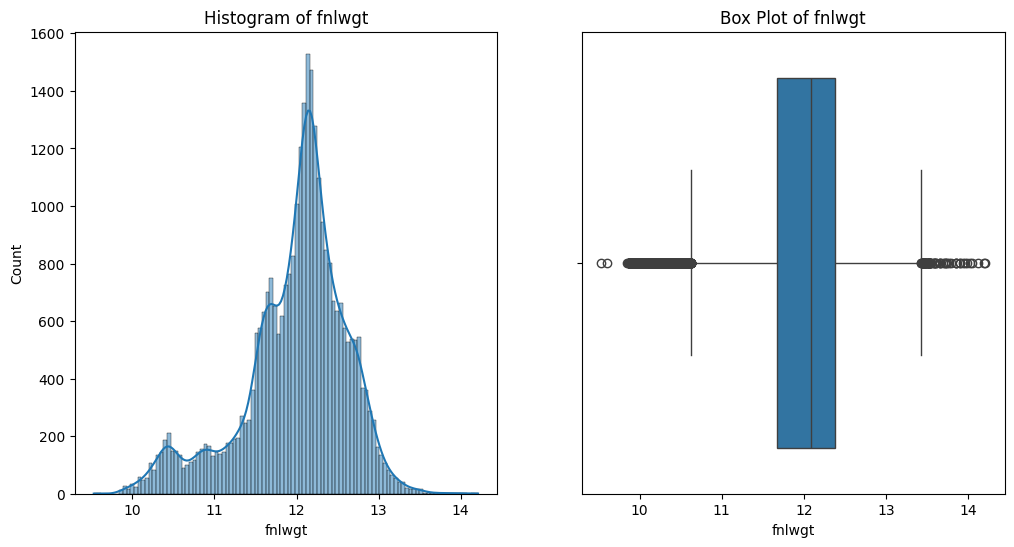

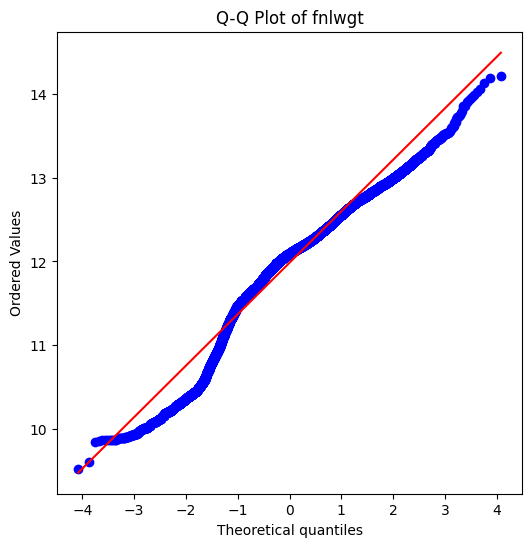

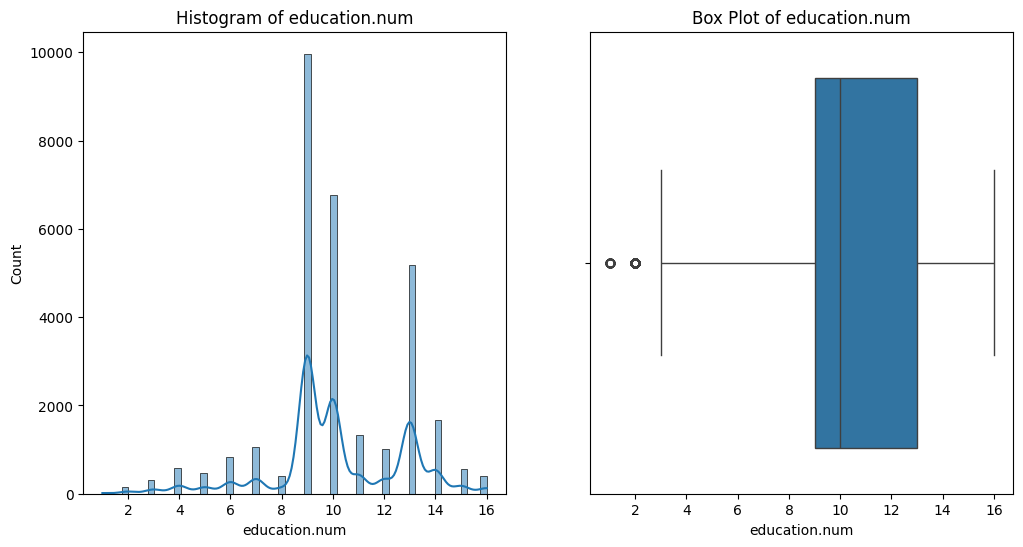

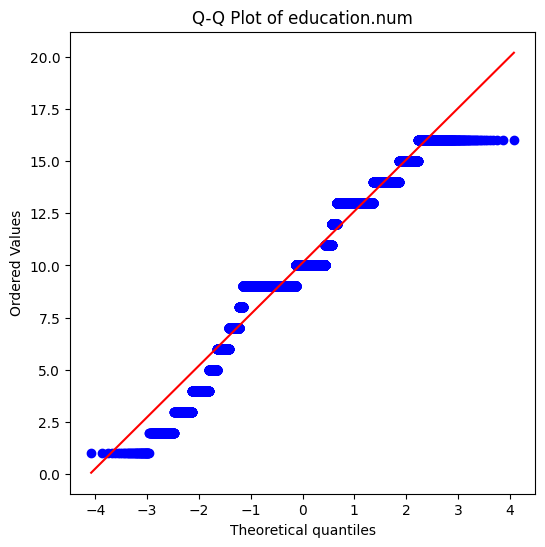

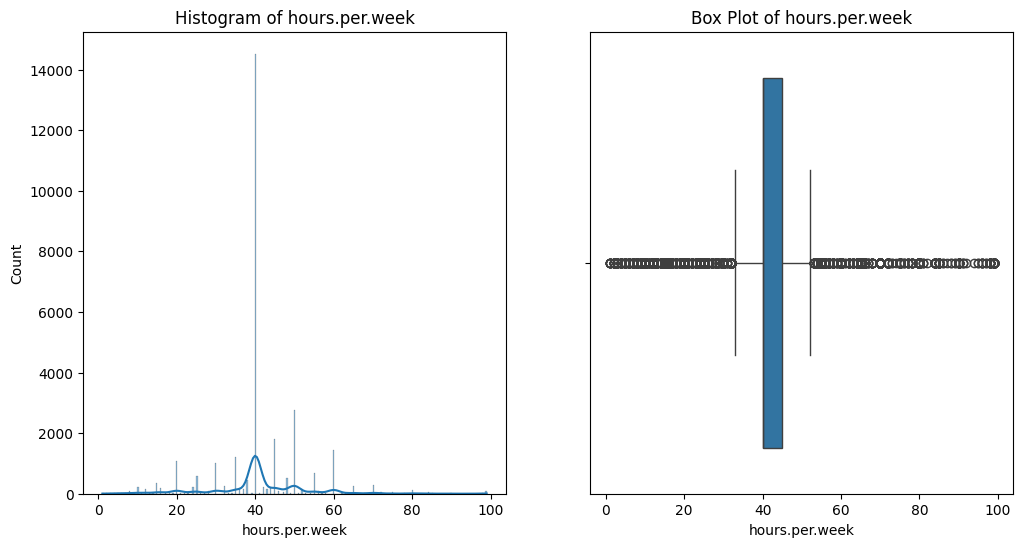

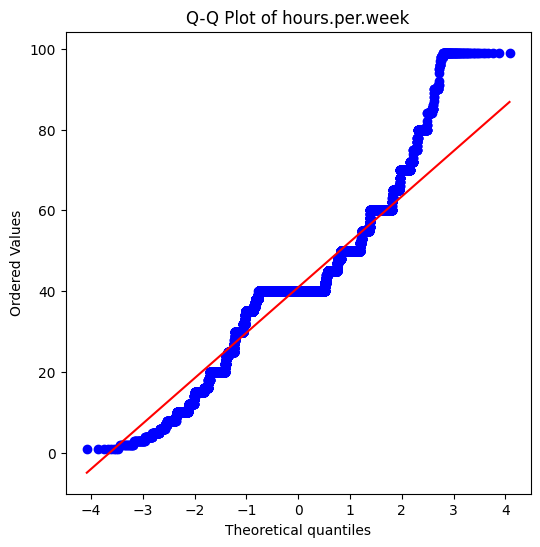

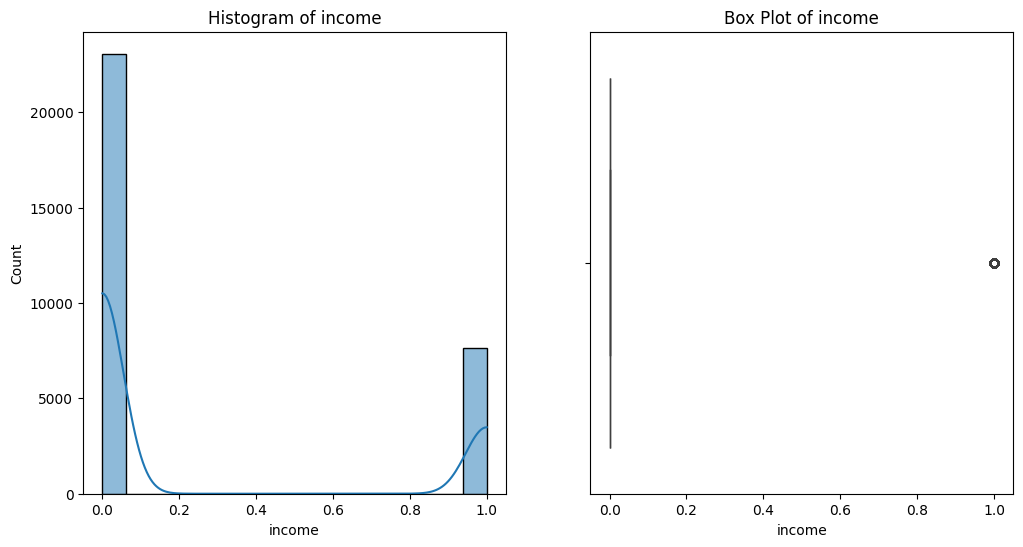

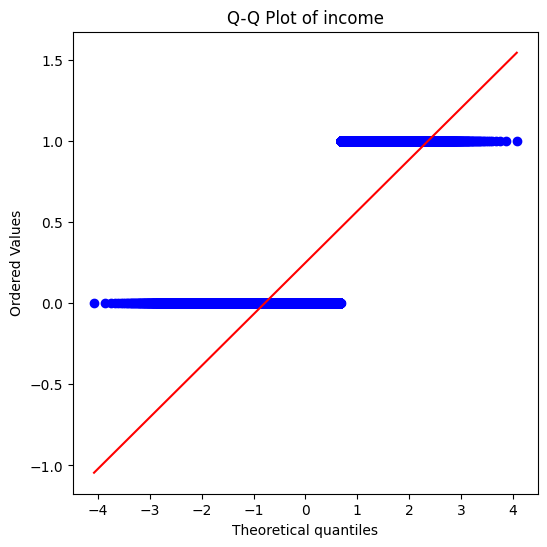

In [60]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Plotting histograms and box plots for each numeric variable
for col in numeric_cols:
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

    plt.show()

    # Q-Q Plot
    plt.figure(figsize=(6, 6))
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
    plt.show()


Let's analyse the missing values in detail:

<ipython-input-14-f3b0ab779dc5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage, y=missing_percentage.index, palette='viridis')


Text(0, 0.5, 'Columns')

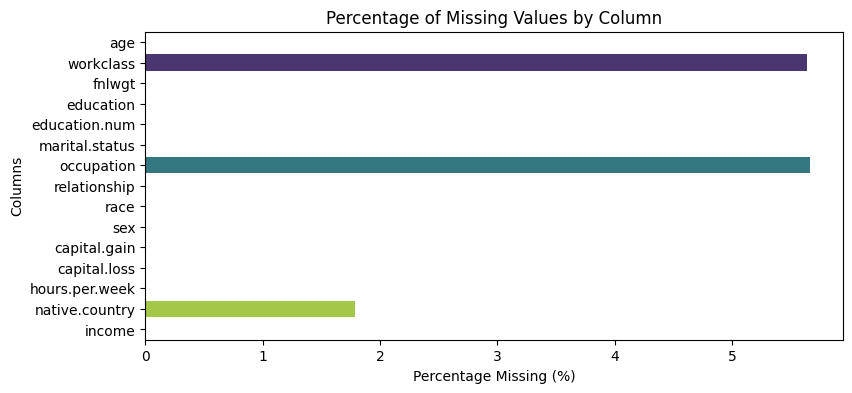

In [14]:
# Create a bar plot to visualize missing values
plt.figure(figsize=(9, 4))
sns.barplot(x=missing_percentage, y=missing_percentage.index, palette='viridis')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage Missing (%)')
plt.ylabel('Columns')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame, X are the features, and y is the target variable
# Replace 'X' and 'y' with your actual features and target variable names

rf = RandomForestClassifier()
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


In [15]:
# Classifying these variable names into list
categorical_columns =['workclass', 'occupation', 'native.country']

#Function to display unique classes and their counts for a column

def display_unique_classes(column_name):
    unique_classes = df[column_name].unique()
    num_of_classes = len(unique_classes)
    class_counts = df[column_name].value_counts()

    print(f"Column is: {column_name}")
    print(f"Number of Unique classes: {num_of_classes}")
    print("Unique Classes:")
    for class_label in unique_classes:
      print(f"- {class_label}: {class_counts.get(class_label, 0)} records")
      print("\n")

for column_name in categorical_columns:
    display_unique_classes(column_name)

Column is: workclass
Number of Unique classes: 9
Unique Classes:
- nan: 0 records


- Private: 22696 records


- State-gov: 1298 records


- Federal-gov: 960 records


- Self-emp-not-inc: 2541 records


- Self-emp-inc: 1116 records


- Local-gov: 2093 records


- Without-pay: 14 records


- Never-worked: 7 records


Column is: occupation
Number of Unique classes: 15
Unique Classes:
- nan: 0 records


- Exec-managerial: 4066 records


- Machine-op-inspct: 2002 records


- Prof-specialty: 4140 records


- Other-service: 3295 records


- Adm-clerical: 3770 records


- Craft-repair: 4099 records


- Transport-moving: 1597 records


- Handlers-cleaners: 1370 records


- Sales: 3650 records


- Farming-fishing: 994 records


- Tech-support: 928 records


- Protective-serv: 649 records


- Armed-Forces: 9 records


- Priv-house-serv: 149 records


Column is: native.country
Number of Unique classes: 42
Unique Classes:
- United-States: 29170 records


- nan: 0 records


- Mexico: 643 records




Based on the analysis of the dataset, it is evident that the 'workclass' and 'native.country' columns exhibit modes that are notably close to the total values in their respective columns. Consequently, a decision is made to replace the missing values in the 'workclass' column with its mode, as well as to fill in the missing values in the 'native.country' column with its mode. However, the 'occupation' column presents a diverse set of unique classes, and its mode is not considered significant. Therefore, the chosen approach involves removing the records (rows) with missing values in the 'occupation' column. This strategy aims to address missing data while considering the characteristics of each specific column

In [16]:
# calculate the mode for workclass and native.country

mode_workclass = df.workclass.mode()[0]
mode_nativecountry = df['native.country'].mode()[0]

print(mode_nativecountry)
print(mode_workclass)

United-States
Private


Now we have modes for both of the columns. Now we will replace the nan values with mode of the following columns.

In [17]:
#replace the nan values with mode for workclass and native.country

df['workclass'].fillna(mode_workclass, inplace = True)
df['native.country'].fillna(mode_nativecountry, inplace = True)

# dropping null rows for occupation column
df.dropna(subset=['occupation'], inplace = True)


#checking if there are any missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

#  Analysis of both numerical and categorical variables

Numerical Variables

In [18]:
# creating a list of columns which are numerical
num_col = df.select_dtypes(include=['int64','float64']).columns.tolist()

#printing num_col
print(num_col)

['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


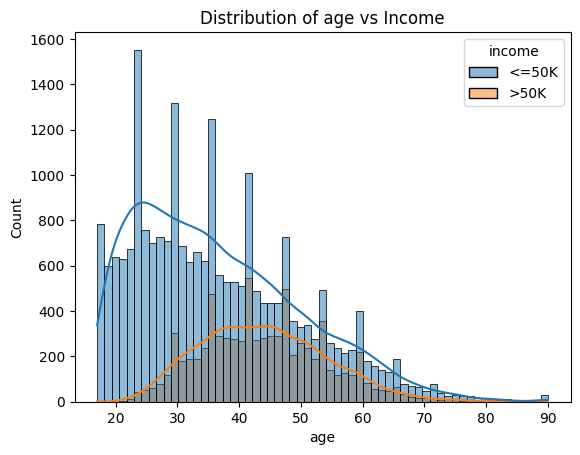

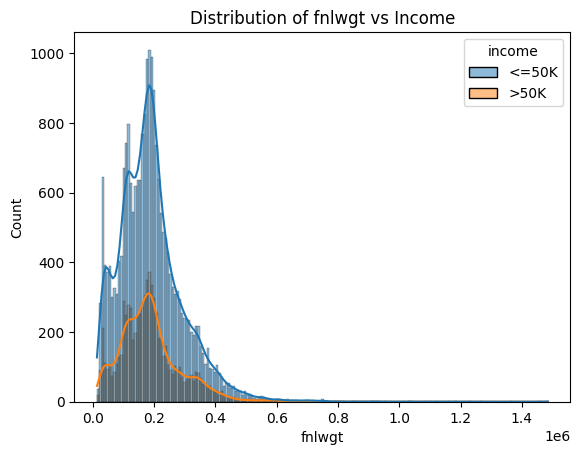

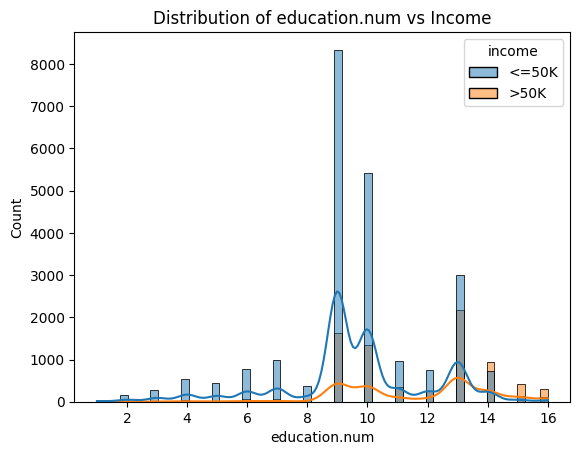

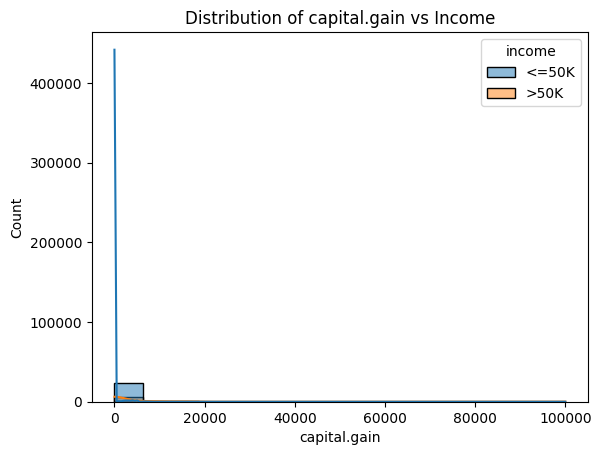

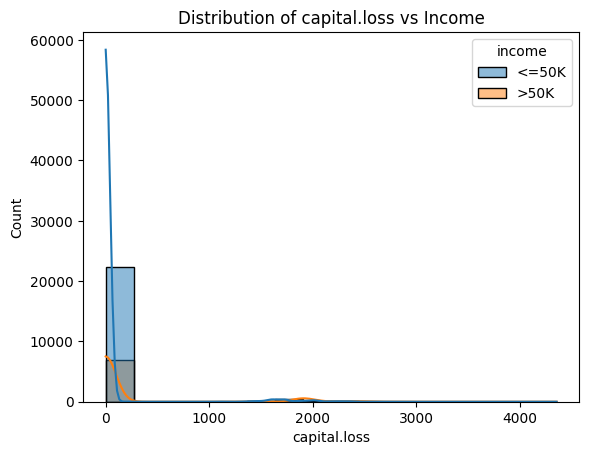

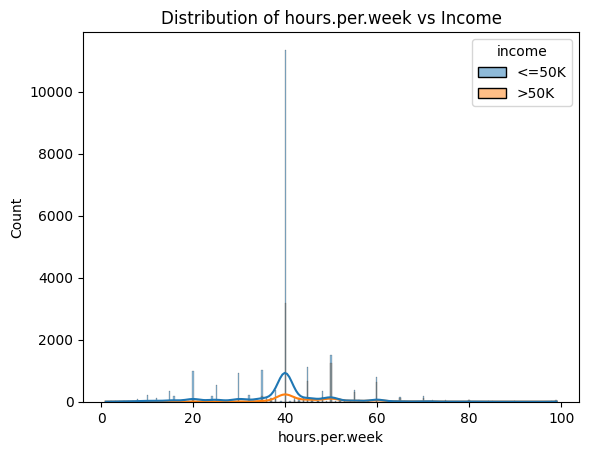

In [19]:
# plotting histograms for seeing the distributions of numerical variables
for col in num_col:
  sns.histplot(data=df, x= col, hue = 'income', kde=True)
  plt.title(f'Distribution of {col} vs Income')
  plt.show()
  print("\n")

Based on the histograms generated above, the following observations can be made:

1. Age Variable:

For the income category '<=50k', the distribution of the 'age' variable is positively skewed, indicating a potential presence of outliers. The distribution for the '>50k' category (orange plot) is also slightly positively skewed.

2. Finalweight Attribute:

The histogram for the 'finalweight' attribute shows a clear positive skewness for all income levels, suggesting the possibility of outliers in the dataset.

3. Education.num Variable:

The distribution of the 'education.num' variable is neither skewed nor normal. Notably, for the value '9', the count is highest for the '<=50k' category, followed by '10' and others. The distribution for the '>50k' category is relatively even but not entirely normal.

4. Capital-Gain and Capital-Loss:

Both 'capital-gain' and 'capital-loss' variables show concentrated values near zero. For 'capital-loss,' there are very few values concentrated near 2000. These observations suggest that both parameters may be redundant for the model, as they don't provide substantial information.

5. Hours per Week:

The 'hours per week' variable exhibits a relatively even distribution, albeit on a smaller scale. There is a notable peak at 40 hours, indicating a potential presence of outliers.




Columns capital.gain and capital.loss will be dropped as they seem redundant for our model having a biased distribution.

In [20]:
# dropping capital-gain and capital-loss columns
df.drop(['capital.gain','capital.loss'],axis=1,inplace=True)

# verify that columns have been dropped
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'hours.per.week', 'native.country', 'income'],
      dtype='object')

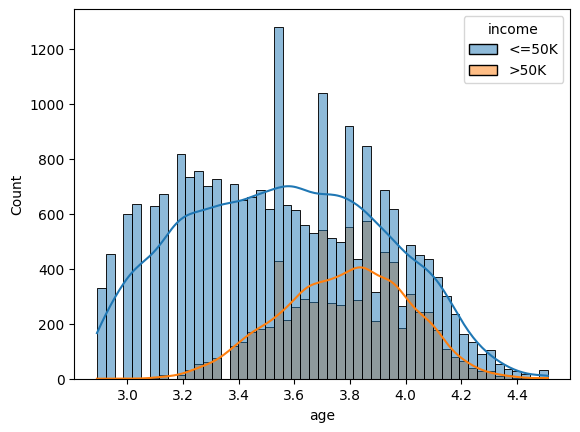

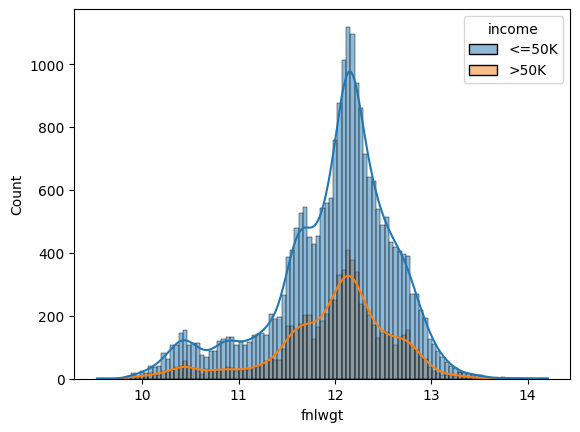

In [21]:
# create a list of columns for applying log transformations
log_list = ['age', 'fnlwgt']

# applying log transformation to the desired columns
for col in log_list:
  df[col]= np.log1p(df[col])

#plotting to see if the distn is normalised
for col in log_list:
  sns.histplot(data=df, x=col, hue='income', kde=True)
  plt.show()

Upon implementing the log transformation, it becomes evident that the distributions of age and final-weight exhibit a more even and closer-to-normal pattern compared to their original distributions.

# **Analyzing categorical features**

In [22]:
#taking categorical cols into cat_cols list
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


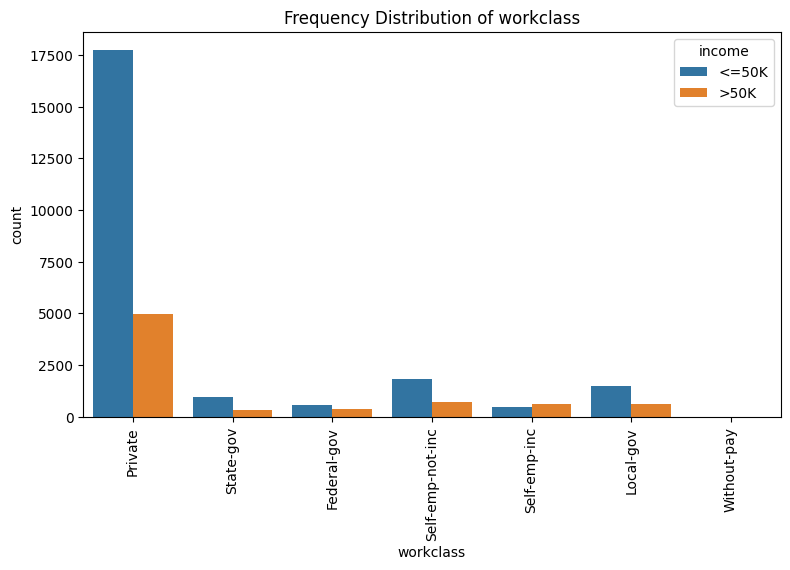

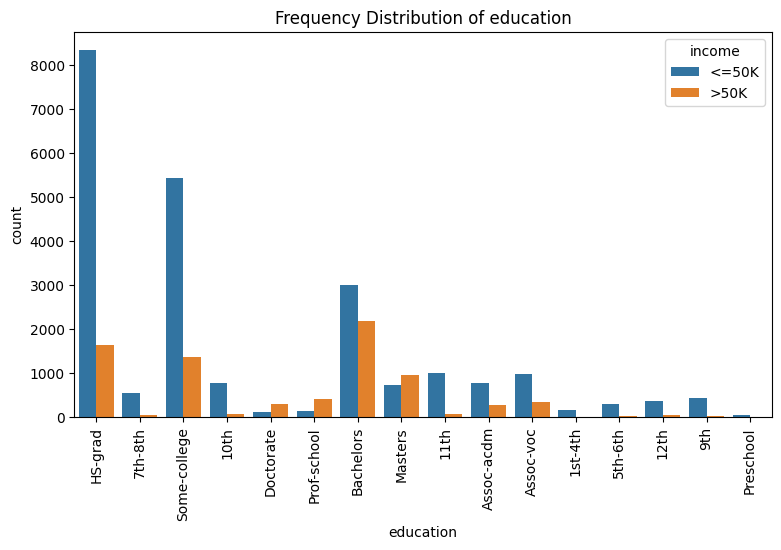

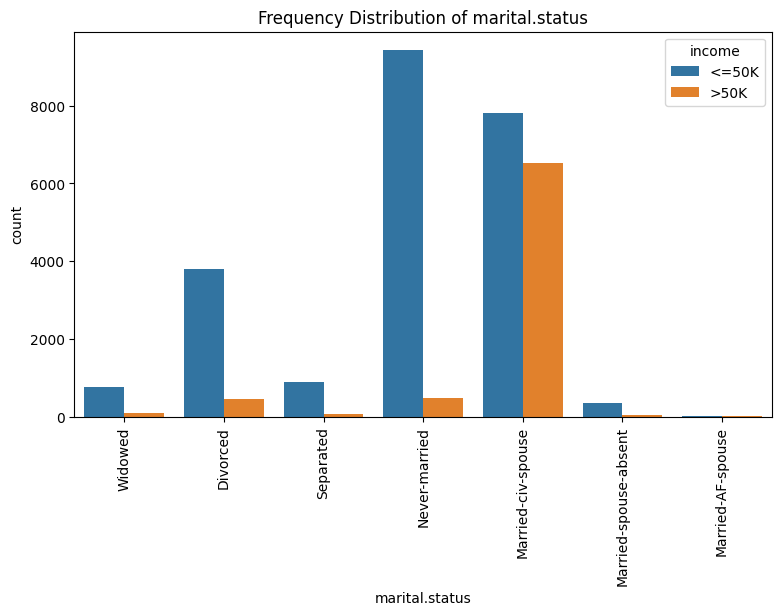

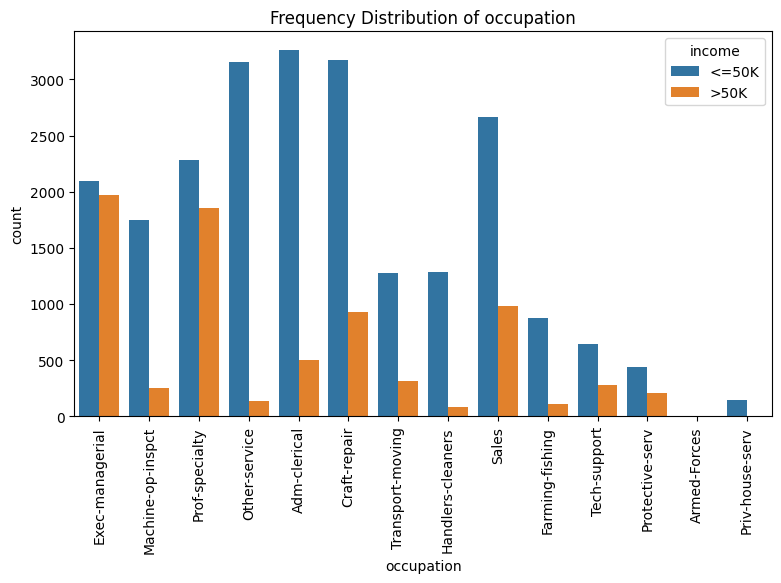

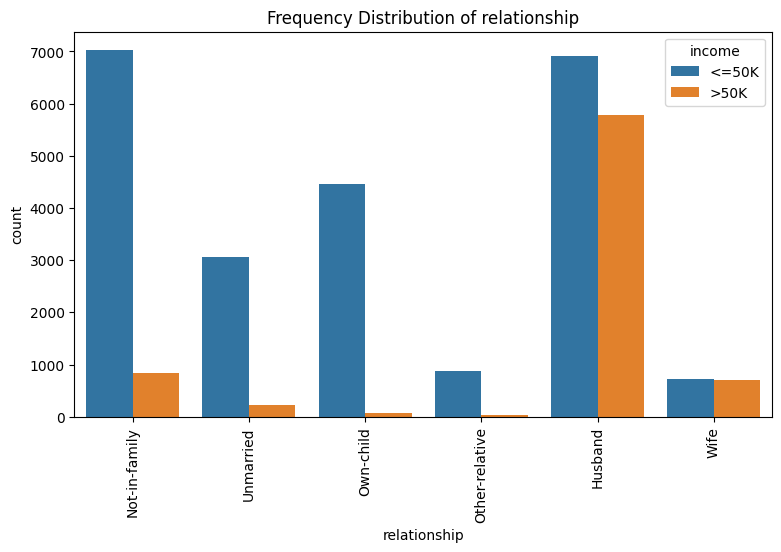

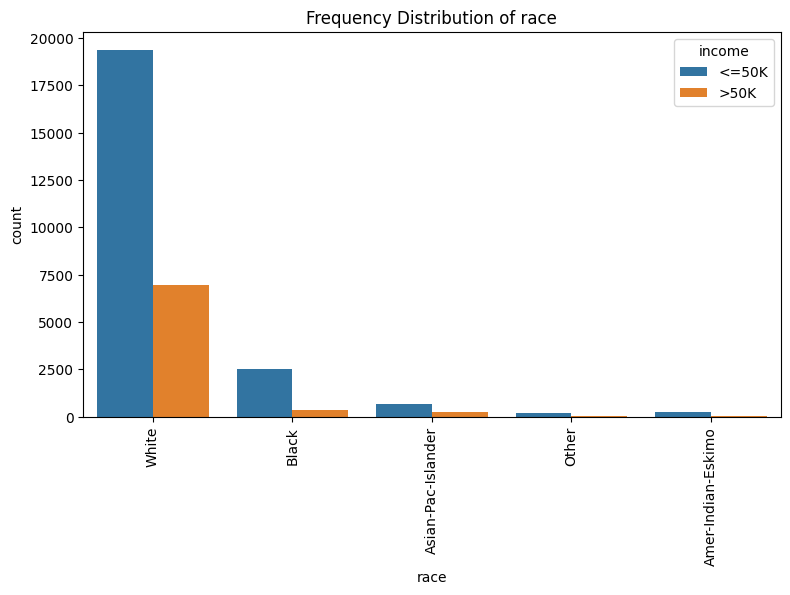

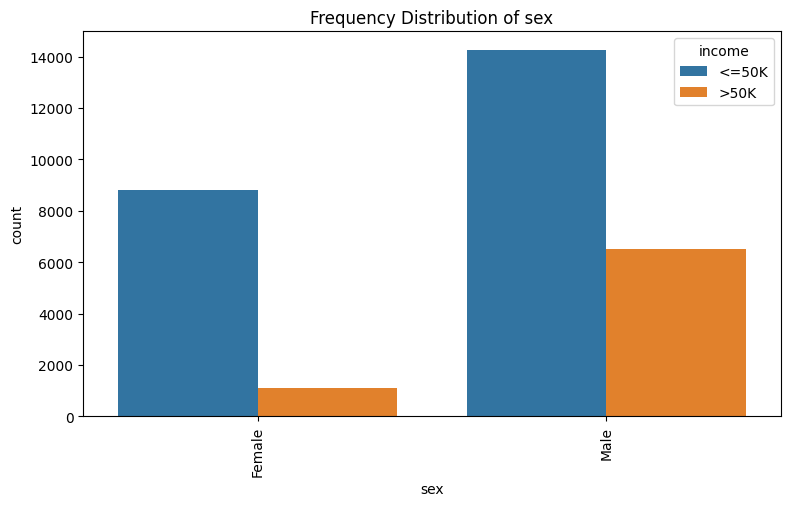

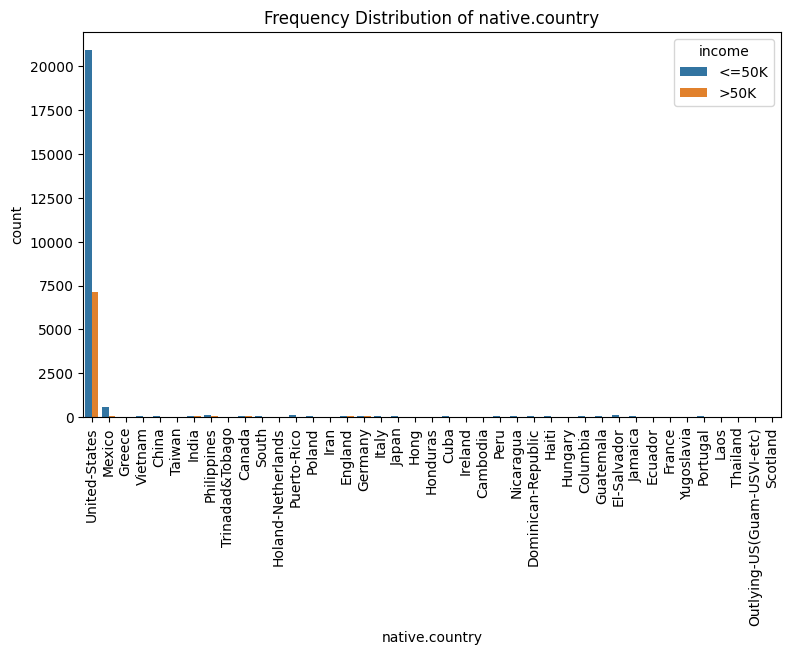

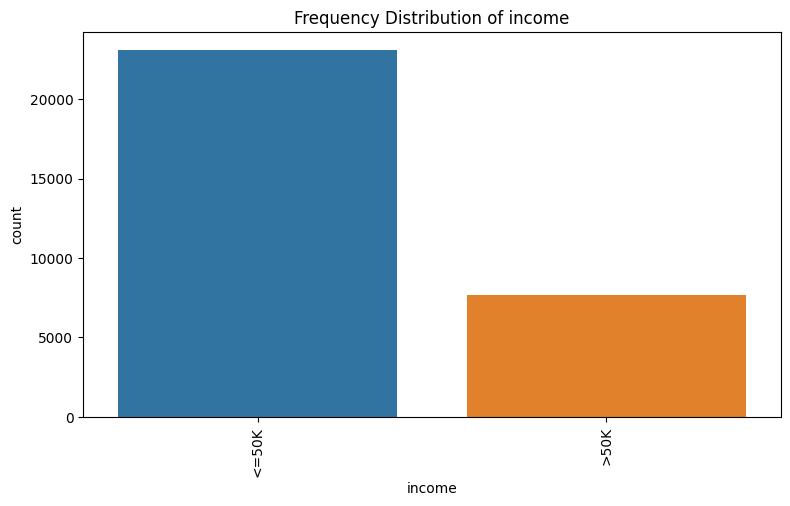

In [23]:
for col in cat_cols:
  plt.figure(figsize=(9,5))
  sns.countplot(data=df,x=col,hue='income')
  plt.title(f'Frequency Distribution of {col}')
  plt.xticks(rotation=90)
  plt.show()
  print("\n")


From the above visualizations, several insights can be derived:

Workclass:

Except for self-employed categories, the number of individuals with an income <=50k is higher than those with income >50k. The private workclass stands out, where a larger proportion earns <=50k compared to those with >50k. Ratios in other workclass categories are relatively comparable.

Education:

Individuals with a bachelor's degree have a balanced income distribution, with comparable numbers earning <=50k and >50k. Those with a doctorate or working as school professors tend to have a higher likelihood of earning >50k. Students or individuals in school typically earn <=50k.

Marital Status:

Individuals with a civilian spouse show a comparable number of people earning <=50k and >50k. The number of people married to someone in the armed forces is notably low.

Occupation:

In managerial roles and professional specialties, the number of individuals earning >50k is similar to those earning <=50k, reflecting the expected income distribution for such roles. Occupations like armed forces and private house service have a higher proportion earning <=50k.

Relationship:

Married individuals, both as husbands and wives, tend to have a higher income. Children, presumably younger individuals, are more likely to earn <=50k. In other scenarios, the number of people earning <=50k is significantly higher than those earning >50k.
|
Native Country:

The majority of individuals in the dataset are from the USA (more than 70%). In the USA, a larger proportion of people earn <=50k. Other countries have a smaller representation in the dataset.
These observations provide valuable insights into the relationships between different socio-economic features and income levels in the dataset.

In [24]:
cat_cols.pop()
cat_cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

# Feature Engineering

In [25]:
# converting the target value to numerical by mapping it to 0 and 1
# so that we can incorporate it in the heatmap

df['income']=df['income'].map({'<=50K': 0, '>50K': 1})



In [26]:
df['income']

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30718, dtype: int64

<ipython-input-27-12e9084194db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


Text(0.5, 1.0, ' Correlation heatmap')

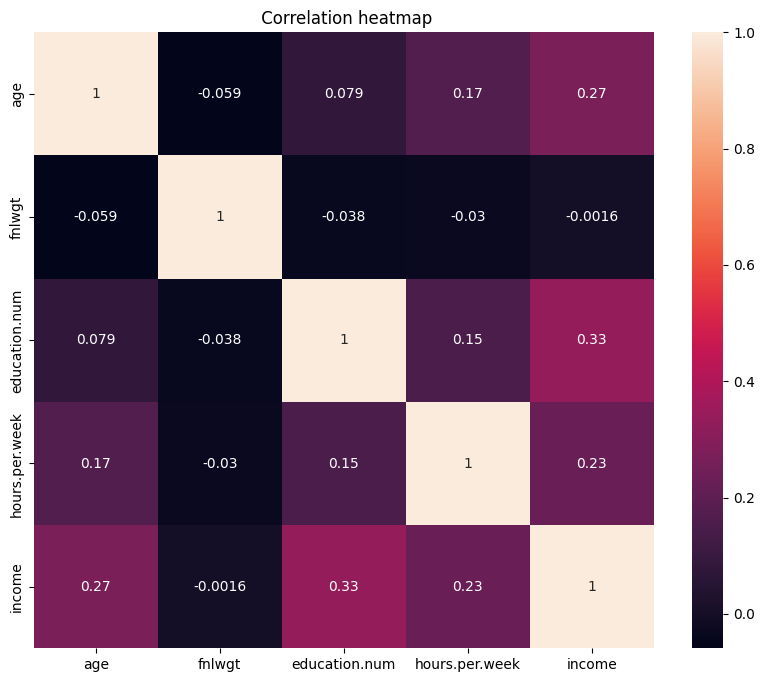

In [27]:
# generating the correlation matrix
cm = df.corr()

# generating the heatmap from correlation matrix
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(cm, annot=True)
plt.title(" Correlation heatmap")

Examining the heatmap, it becomes evident that all variables exhibit notable correlations with our target variable, income. This implies that each variable is in some manner connected to the target variable, and the outcome is dependent on these features. Furthermore, the correlation between independent variables is not excessively high, indicating that there is no need for Principal Component Analysis or Dimensionality reduction. Multicollinearity does not appear to be a significant concern in the dataset.

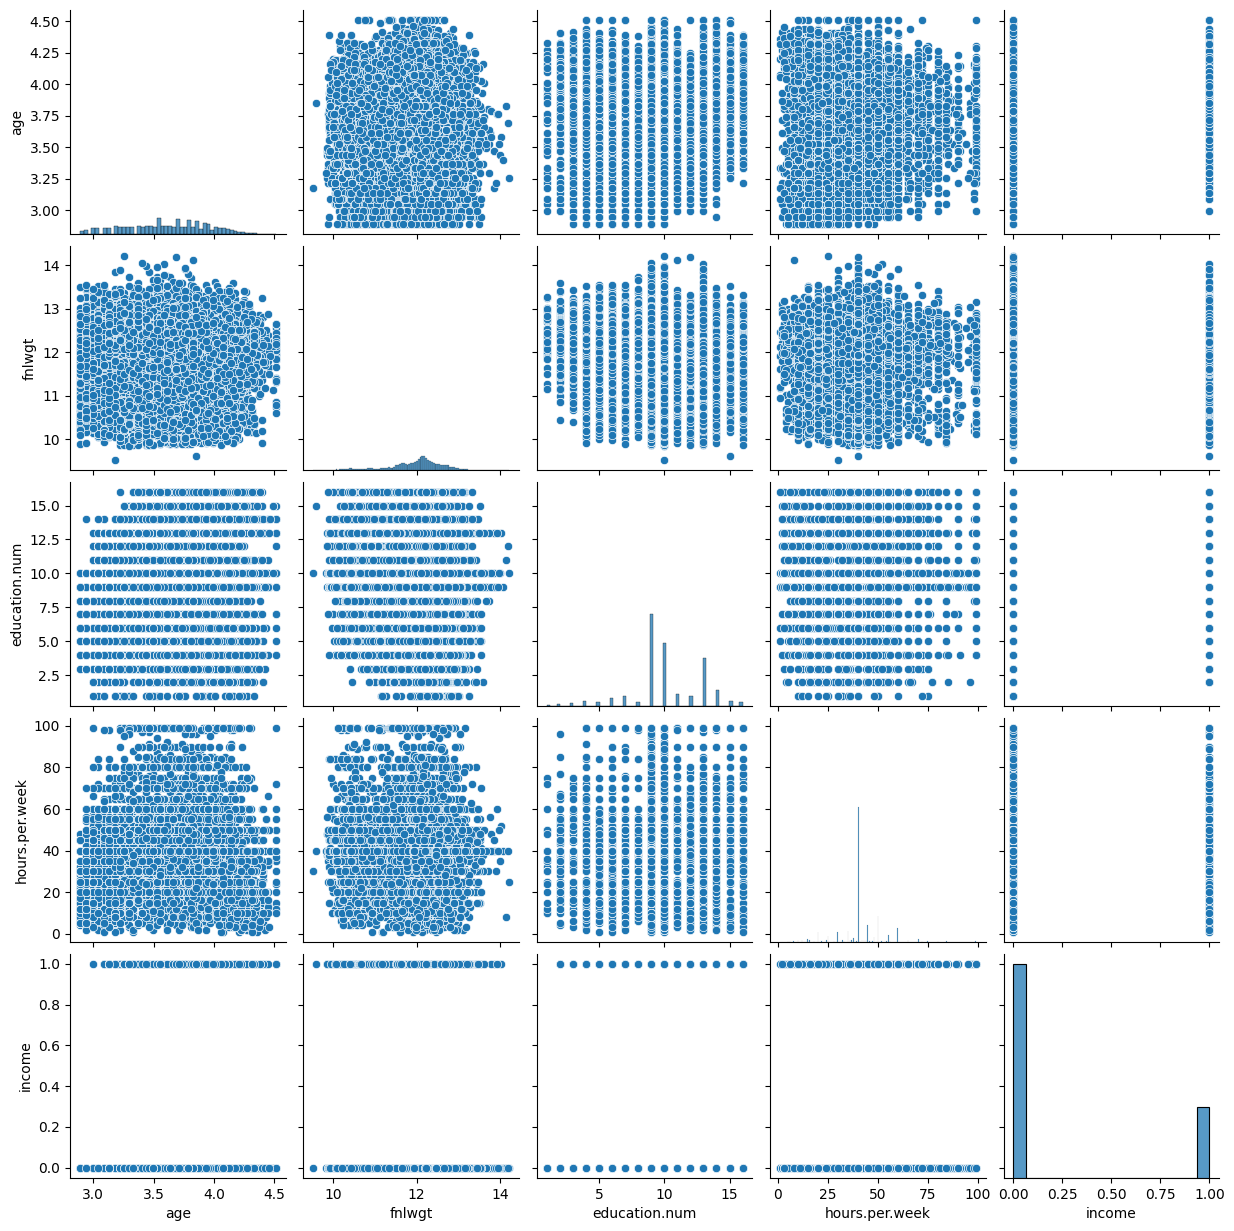

In [28]:
plt = sns.pairplot(data=df)


# Model Implementation


Having completed the data pre-processing and feature engineering steps, the next phase involves the application of diverse machine learning algorithms. This entails fitting the dataset to these algorithms, analyzing accuracy metrics, and ultimately determining which model best suits our data and how accurately it performs.

In [29]:
X = df.drop(['income'],axis =1)
Y = df['income']

In [30]:
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
1,4.418841,Private,11.797134,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States
3,4.007333,Private,11.851966,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States
4,3.737670,Private,12.486216,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States
5,3.555348,Private,12.287030,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States
6,3.663562,Private,11.922396,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States


We have seperated the target variable i.e. 'income' from the df

In [31]:
Y.head()

1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state= 42)


Since the categorical columns do not possess numerical values, they cannot be directly utilized as inputs for the model. Consequently, encoding is required to represent these categorical values numerically. In this case, the label encoder library will be employed to perform the encoding process.

In [33]:
from sklearn import preprocessing


for col in cat_cols:
  lev = preprocessing.LabelEncoder()
  X_train[col] = lev.fit_transform(X_train[col])
  X_test[col] = lev.fit_transform(X_test[col])

In [34]:
X_test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
16494,2.995732,2,10.731319,15,10,4,5,1,4,1,45,37
22678,3.295837,2,12.258262,11,9,2,13,0,4,1,52,37
14600,3.784190,2,12.134518,15,10,0,0,4,4,0,40,37
10095,3.044522,2,12.308909,11,9,2,0,5,4,0,40,24
4346,3.850148,2,11.892703,7,12,0,12,1,2,0,36,37


In [35]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country
31369,3.610918,2,11.031319,15,10,2,2,0,4,1,60,38
31013,3.044522,2,11.781738,0,6,4,5,3,4,1,40,38
1594,3.761200,1,12.106175,0,6,2,5,0,4,1,40,38
2979,4.219508,1,12.164214,9,13,0,0,4,2,0,35,38
5398,3.295837,2,12.181298,11,9,4,11,1,3,1,40,38


In [36]:
# importing neccesary libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))



# Modelling

Next, we will deploy diverse models based on the nature of our dataset. In our scenario, the target variable is categorical. Additionally, considering the ample amount of data available, it is prudent to employ models with the capacity to handle complexity and large datasets effectively

Logistic Regression

In [37]:
# importing model libraries
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

# predicting test cases
y_pred = model.predict(X_test)
print(Y_test)

16494    0
22678    1
14600    0
10095    0
4346     0
        ..
20117    0
6966     0
9755     0
16642    0
11070    0
Name: income, Length: 9216, dtype: int64


In [38]:
# printing the classification report to analyze model performance
from sklearn import metrics
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6932
           1       0.66      0.41      0.50      2284

    accuracy                           0.80      9216
   macro avg       0.74      0.67      0.69      9216
weighted avg       0.78      0.80      0.78      9216




The classification report highlights that the model excels in accurately classifying individuals with income <=50k. However, its performance is notably weaker in identifying individuals with income >50k, as indicated by a recall of 0.41. This implies that, out of the actual instances of class 1 (income >50k), the model can accurately predict only 41% of the records. Consequently, there is a tendency for the model to misclassify individuals with actual income >50k as having income <=50k.

In [39]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(Y_test, model.predict(X_test)) * 100
train_score = accuracy_score(Y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,80.173937,80.034722


The training and testing accuracy is consistent. Hence, the model does not overfit the data.

In [40]:
#importing neccessary libraries
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

dt=model.predict(X_test)

from sklearn import metrics

print(metrics.classification_report(Y_test,dt))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6932
           1       0.53      0.55      0.54      2284

    accuracy                           0.77      9216
   macro avg       0.69      0.69      0.69      9216
weighted avg       0.77      0.77      0.77      9216




The model demonstrates effective performance for class 0. However, for class 1, the recall is 0.49, indicating that the model accurately predicts 49% of the actual positive instances. In other words, out of the total positive cases, the model correctly identifies 49%

In [41]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(Y_test, model.predict(X_test)) * 100
train_score = accuracy_score(Y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,99.990699,76.692708


In [42]:
from sklearn.svm import SVC
model=SVC(kernel="rbf")
model.fit(X_train,Y_train)
sv=model.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(Y_test,sv))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6932
           1       0.71      0.49      0.58      2284

    accuracy                           0.82      9216
   macro avg       0.78      0.71      0.73      9216
weighted avg       0.81      0.82      0.81      9216




The model exhibits strong performance for class 0; however, for class 1, the recall is 0.49. This implies that out of the actual positive instances, the model accurately predicts 49% of the data.

In [43]:
from sklearn.metrics import accuracy_score

test_score = accuracy_score(Y_test, model.predict(X_test)) * 100
train_score = accuracy_score(Y_train, model.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,83.262022,82.291667


The training and testing accuracies exhibit similarity, indicating that the model does not overfit the data.

In [44]:
import xgboost as xgb
from sklearn.metrics import classification_report

# creating an xgboost classifier

xgb_model = xgb.XGBClassifier(objective = "binary:logistic",random_state=42,use_label_encoder=False)

xgb_model.fit(X_train,Y_train)

xgb_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(Y_test,xgb_pred)

print("Accuracy",accuracy)

print(classification_report(Y_test, y_pred))

Accuracy 0.7894965277777778
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6932
           1       0.66      0.41      0.50      2284

    accuracy                           0.80      9216
   macro avg       0.74      0.67      0.69      9216
weighted avg       0.78      0.80      0.78      9216



The model shows strong performance for class <=50k, but there is still potential for improvement in predicting class >=50k.

In [45]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(
    n_estimators=50,  # Number of weak learners (decision trees)
    random_state=42,
)
ada_model.fit(X_train, Y_train)

ada_pred =ada_model.predict(X_test)

print("Classification Report")
print(classification_report(Y_test,ada_pred))


print("Confusion matrix")
print(confusion_matrix(Y_test,ada_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6932
           1       0.70      0.56      0.62      2284

    accuracy                           0.83      9216
   macro avg       0.78      0.74      0.76      9216
weighted avg       0.82      0.83      0.83      9216

Confusion matrix
[[6381  551]
 [ 999 1285]]


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# Creating a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(
    n_estimators=50,  # Number of weak learners (decision trees)
    random_state=42,
)

# Training the Gradient Boosting model
gb_model.fit(X_train, Y_train)

# Making predictions on the test set
gb_pred = gb_model.predict(X_test)

# Printing the classification report
print("Classification Report")
print(classification_report(Y_test, gb_pred))

# Printing the confusion matrix
print("Confusion matrix")
print(confusion_matrix(Y_test, gb_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6932
           1       0.72      0.52      0.60      2284

    accuracy                           0.83      9216
   macro avg       0.79      0.73      0.75      9216
weighted avg       0.82      0.83      0.82      9216

Confusion matrix
[[6476  456]
 [1096 1188]]



The model shows strong performance in predicting instances of class 0 (<=50k) with high precision and recall. However, it struggles with class 1 (>50k), as indicated by a lower recall for this class. While the overall accuracy is decent, there's room for improvement in predicting instances of class 1. Fine-tuning the model or addressing class imbalance, if applicable, may be necessary for better performance, depending on the specific application

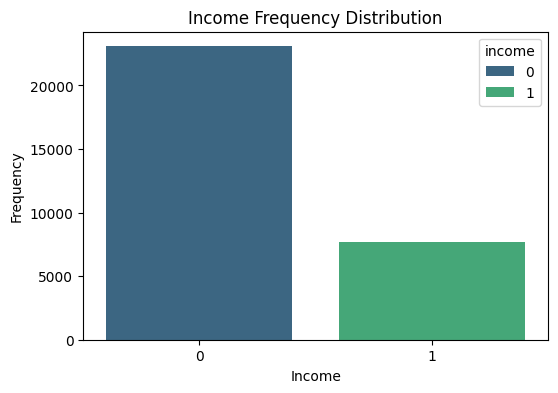

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'income' is the column in your DataFrame
income_freq = df['income'].value_counts()

# Plotting the frequency distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=df, palette='viridis', hue='income')
plt.title('Income Frequency Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()



We can see that there is data imbalance in between income <=50k and income >=50k. So now we will be using SMOTE method to handle this.





# Handling data imbalance using SMOTE

The prediction statistics for each model indicate better performance for class 0 compared to class 1. Upon visualizing the distribution of the target variable "income," it's apparent that there are approximately 22k data points for class 0, while class 1 has around 8k data points. This imbalance in the dataset may lead to overfitting and suboptimal precision and recall for the minority class, as reflected in the machine learning model results. To address this issue, we employ SMOTE (Synthetic Minority Oversampling Technique), a method that generates artificial samples for the minority class to balance the dataset and improve model performance.

In [48]:
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 70:30
X_trainr, X_testr,Y_trainr,Y_testr = train_test_split(X,Y,test_size=0.3,random_state = 42)

from sklearn import preprocessing

# label encoding transform
for col in cat_cols:
  le = preprocessing.LabelEncoder()
  X_trainr[col] = le.fit_transform(X_trainr[col])
  X_testr[col] = le.fit_transform(X_testr[col])

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy=0.40)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_trainr, Y_trainr)

In [50]:
#feature scaling

# importing neccessary libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform
X_train_resampled = pd.DataFrame(scaler.fit_transform(X_train_resampled))
X_testr = pd.DataFrame(scaler.fit_transform(X_testr))




In [51]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(
    n_estimators=50,  # Number of weak learners (decision trees)
    random_state=42,
)
ada_model.fit(X_train_resampled, Y_train_resampled)

ada_predr = ada_model.predict(X_testr)

print("Classification Report")
print(classification_report(Y_testr,ada_predr))


print("Confusion matrix")
print(confusion_matrix(Y_testr,ada_predr))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6932
           1       0.65      0.63      0.64      2284

    accuracy                           0.83      9216
   macro avg       0.77      0.76      0.76      9216
weighted avg       0.82      0.83      0.83      9216

Confusion matrix
[[6167  765]
 [ 836 1448]]



The application of SMOTE has led to improvements in our outcomes for the minority class. The precision and recall values, now at 65 and 63, respectively, signify enhanced consistency in the model's predictions, demonstrating improved performance

In [52]:
import xgboost as xgb
from sklearn.metrics import classification_report

# creating an xgboost classifier

xgb_model = xgb.XGBClassifier(objective = "binary:logistic",random_state=42,use_label_encoder=False)

xgb_model.fit(X_train_resampled,Y_train_resampled)

xgb_predr = xgb_model.predict(X_testr)

accuracy = accuracy_score(Y_testr,xgb_predr)

print("Accuracy",accuracy)

print(classification_report(Y_testr, xgb_predr))

Accuracy 0.6418185763888888
              precision    recall  f1-score   support

           0       0.94      0.56      0.70      6932
           1       0.40      0.89      0.55      2284

    accuracy                           0.64      9216
   macro avg       0.67      0.72      0.63      9216
weighted avg       0.80      0.64      0.66      9216



In [53]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train_resampled, label=Y_train_resampled)

params = {
    "objective": "binary",  # For binary classification
    "boosting_type": "gbdt",  # Gradient Boosting Decision Tree
    "metric": "binary_logloss",  # Evaluation metric
    "num_leaves": 31,  # Maximum number of leaves in a tree
    "learning_rate": 0.05,  # Learning rate
    "feature_fraction": 0.9,  # Fraction of features to be used in each tree
    "bagging_fraction": 0.8,  # Fraction of data to be used in each tree
    "bagging_freq": 5,  # Frequency of bagging
}



num_round = 100  # Number of boosting rounds (iterations)

# Train the model
lgb_model = lgb.train(params, train_data, num_round)

lgb_predr = lgb_model.predict(X_testr, num_iteration=lgb_model.best_iteration)
lgb_predr_binary = [1 if pred >= 0.5 else 0 for pred in lgb_predr]

# Evaluate the model
accuracy = accuracy_score(Y_testr, lgb_predr_binary)
print("Accuracy:", accuracy)
print(classification_report(Y_testr, lgb_predr_binary))
print(confusion_matrix(Y_test, lgb_predr_binary))

[LightGBM] [Info] Number of positive: 6454, number of negative: 16136
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 674
[LightGBM] [Info] Number of data points in the train set: 22590, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285702 -> initscore=-0.916353
[LightGBM] [Info] Start training from score -0.916353
Accuracy: 0.8314887152777778
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6932
           1       0.66      0.67      0.66      2284

    accuracy                           0.83      9216
   macro avg       0.77      0.78      0.77      9216
weighted avg       0.83      0.83      0.83      9216

[[6141  791]
 [ 762 1522]]


Out of all the machine learning models considered for predictions, LightGBM stands out as the most effective. It exhibits strong performance for class 0 predictions and demonstrates satisfactory results for class 1. With precision and recall values of 0.66 and 0.67 for class 1, respectively, the model consistently delivers accurate predictions. Therefore, we choose LightGBM as our final model for making predictions.

# **Finding** **Outliers**

As observed in the LightGBM model above, we achieve respectable precision and recall for both classes. However, we have not yet addressed the presence of outliers. Our next step involves removing outliers to assess the impact on precision and recall.

In [54]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.pop()
num_cols

['age', 'fnlwgt', 'education.num', 'hours.per.week']

In [55]:
import pandas as pd

# Assuming you have a DataFrame 'df' with your dataset

# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column, k=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]



# Define the outlier factor 'k'
k = 1.5

# Create a new DataFrame without outliers
df_cleaned = df.copy()
for column in num_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, column, k)

In [56]:
X_o = df_cleaned.drop(['income'],axis=1)
Y_o = df_cleaned['income']

# splitting the data into train and test split
from sklearn.model_selection import train_test_split

# splitting the data into train and test in the ratio 70:30
X_train_o, X_test_o,Y_train_o,Y_test_o = train_test_split(X_o,Y_o,test_size=0.3,random_state = 42)

from sklearn import preprocessing

# label encoding transform
for col in cat_cols:
  le = preprocessing.LabelEncoder()
  X_train_o[col] = le.fit_transform(X_train_o[col])
  X_test_o[col] = le.fit_transform(X_test_o[col])

# importing neccesary libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform
X_train_o = pd.DataFrame(scaler.fit_transform(X_train_o))
X_test_o = pd.DataFrame(scaler.fit_transform(X_test_o))

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,sampling_strategy=0.40)
X_train_resampled_o, Y_train_resampled_o = smote.fit_resample(X_train_o, Y_train_o)

import lightgbm as lgb

train_data_o = lgb.Dataset(X_train_resampled_o, label=Y_train_resampled_o)

params = {
    "objective": "binary",  # For binary classification
    "boosting_type": "gbdt",  # Gradient Boosting Decision Tree
    "metric": "binary_logloss",  # Evaluation metric
    "num_leaves": 31,  # Maximum number of leaves in a tree
    "learning_rate": 0.05,  # Learning rate
    "feature_fraction": 0.9,  # Fraction of features to be used in each tree
    "bagging_fraction": 0.8,  # Fraction of data to be used in each tree
    "bagging_freq": 5,  # Frequency of bagging
}



num_round = 100  # Number of boosting rounds (iterations)

# Train the model
lgb_model = lgb.train(params, train_data_o, num_round)

lgb_predo = lgb_model.predict(X_test_o, num_iteration=lgb_model.best_iteration)
lgb_predo_binary = [1 if pred >= 0.5 else 0 for pred in lgb_predo]

# Evaluate the model
accuracy = accuracy_score(Y_test_o, lgb_predo_binary)
print("Accuracy:", accuracy)
print(classification_report(Y_test_o, lgb_predo_binary))
print(confusion_matrix(Y_test_o, lgb_predo_binary))




[LightGBM] [Info] Number of positive: 4415, number of negative: 11039
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 15454, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285687 -> initscore=-0.916427
[LightGBM] [Info] Start training from score -0.916427
Accuracy: 0.7977492966552048
              precision    recall  f1-score   support

           0       0.89      0.82      0.86      4686
           1       0.60      0.73      0.66      1712

    accuracy                           0.80      6398
   macro avg       0.75      0.78      0.76      6398
weighted avg       0.81      0.80      0.80      6398

[[3860  826]
 [ 468 1244]]


### **Precision-Recall Curve**

The Precision-Recall Curve (P-R curve) is employed in machine learning to enhance our understanding of a model's performance, particularly in the context of data imbalance and outlier handling. We will generate P-R curves for datasets with and without outliers. The Area Under the Curve (AUC) score, representing the area under the P-R curve, serves as a metric for model performance. A higher AUC score indicates improved precision and recall in the model.

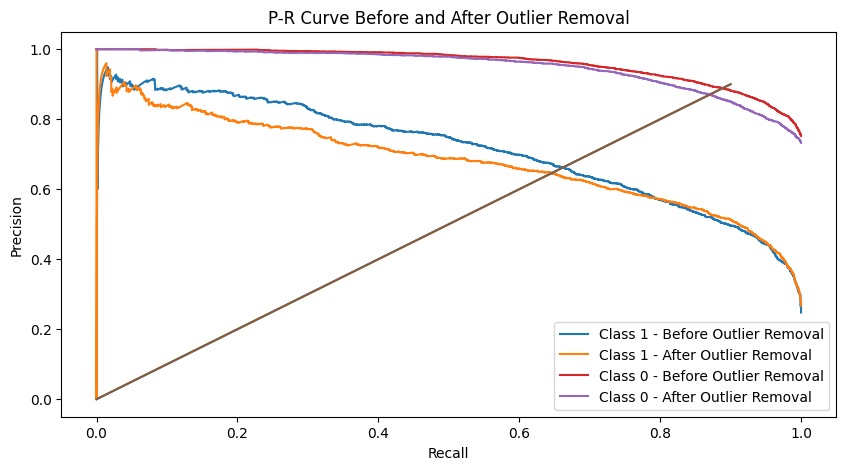

In [57]:


from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
x= np.arange(0,1,0.1)
y = np.arange(0,1,0.1)
p1, r1, _ = precision_recall_curve(Y_testr, lgb_predr)
p2, r2, _ = precision_recall_curve(Y_test_o, lgb_predo)

plt.figure(figsize=(10, 5))

# Plot Precision-Recall Curve for Class 0
plt.plot(r1, p1, label="Class 1 - Before Outlier Removal")
plt.plot(r2,p2,label="Class 1 - After Outlier Removal")
plt.plot(x,y)


# Plot Precision-Recall Curve for Class 1


p3, r3, _ = precision_recall_curve(1 - Y_testr, 1 - lgb_predr)  # Invert labels for Class 1
p4, r4, _ = precision_recall_curve(1 - Y_test_o, 1 - lgb_predo)  # Invert labels for Class 1
plt.plot(r3, p3, label="Class 0 - Before Outlier Removal")
plt.plot(r4, p4, label="Class 0 - After Outlier Removal")
plt.plot(x,y)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("P-R Curve Before and After Outlier Removal")
plt.legend()
plt.show()


## **Inference**


The Precision-Recall Curve analysis reveals the following insights:

-> For class 0 (income <=50k), where there is an ample amount of data, the P-R curve remains almost the same before and after outlier removal. The Area Under Curve (AUC) is higher before outlier removal, indicating that class 0 experiences no significant change in Precision-Recall after removing outliers.

-> For class 1 (income >50k), there is a noticeable change in AUC. Before removing outliers, the precision and recall are 0.67 and 0.68, indicating consistent results. After removing outliers, the precision and recall become 0.60 and 0.73, respectively. This suggests that the model, post-outlier removal, tends to predict more instances as >50k that are actually <=50k. The higher recall (0.73) means that out of the actual predictions of people having income <=50k, the model correctly predicts 73%. Therefore, keeping outliers may lead to more consistent predictions for class 1.

# **# Question and Answers**

Answer the following questions:

1. What are the data types? (Only numeric and categorical)

The numerical columns are:

age

fnlwgt

education.num

capital.gain

capital.loss

hours.per.week

The categorical columns are:

workclass

education

marital.status

occupation

relationship

race

sex

native.country

income



2. Are there missing values?

Although there are missing values present in the data, they are represented by the symbol '?' instead of 'nan'. Therefore, we will convert these '?' symbols into 'nan' for clarity and consistency in handling missing values

3. What are the likely distributions of the numeric variables?

Please navigate to the section titled 'Analysis of Numerical and Categorical Variables' for reference.

4 Which independent variables have missing data? How much?


age 0 workclass 1836 fnlwgt 0 education 0 education.num 0 marital.status 0 occupation 1843 relationship 0 race 0 sex 0 capital.gain 0 capital.loss 0 hours.per.week 0 native.country 583 income 0



5. Do the training and test sets have the same data?

We have not defined a separate training and testing dataset. Instead, we utilize the 'train_test_split' function from scikit-learn to split the data, allocating 80% for training and 20% for testing

6. In the predictor variables independent of all the other predictor variables?

Yes, it's evident from the heatmap that the predictor variables are entirely independent of one another. There is no indication of multicollinearity among them.

7. Which predictor variables are the most important?

A. age B. workclass C. fnlwgt D. education E. education.num F. marital.status G. occupation H. relationship I. race J. sex K. hours.per.week L. native.country.

8. Do the ranges of the predictor variables make sense?

Except for capital-gain and capital-loss, all the variable ranges exhibit meaningful patterns. The plots in the notebook reveal that capital-gain and capital-loss have non-standard distributions. As a result, we have decided to exclude these columns from the analysis

9. What are the distributions of the predictor variables?   

Numerical Variables:

Age: For the 'income <=50k' category, the age distribution is positively skewed, suggesting the possibility of outliers. In the 'income >50k' category (orange plot), the distribution is also slightly positively skewed.

FinalWeight: The distribution of the 'finalweight' attribute is noticeably positively skewed for all income values, indicating a potential presence of outliers.

Education.Num: The distribution of 'education.num' is not skewed but not perfectly normal either. For 'education.num' value 9, there is a maximum count for 'income <=50k,' followed by values 10 and others. In the 'income >50k' category, the distribution is more even but still not normal.

Hours per Week: The distribution of 'hours per week' is relatively even but on a smaller scale. There is a peak at 40 hours, suggesting a potential presence of outliers.

Capital-Gain and Capital-Loss: Both 'capital-gain' and 'capital-loss' variables have values concentrated near zero, with very few values concentrated near 2000. These variables may be redundant for the model as they do not provide significant information.

Categorical Variables:

Workclass: Except for self-employed categories, there are more people with 'income <=50k' than those with 'income >50k.' Private workclass has a higher proportion of individuals with income less than 50k compared to those with income greater than 50k. In all other categories, the ratio of income is comparable.

Education: Individuals with a bachelor's degree tend to have a decent salary. The number of people with 'income >50k' is almost comparable to those earning '<=50k.' Doctorate degree holders and school professors are more likely to have income greater than 50k. Students or individuals in school are more likely to earn <=50k.

Marital-Status: People with a civilian spouse and income greater than 50k are comparable in number to those with income less than 50k. However, there are very few individuals married to spouses in the armed forces.

Occupation: Individuals in managerial roles earning 'income >50k' are roughly equal in number to those earning '<=50k,' which is typical for such positions. Professionals, including professors, show a similar pattern. Those in the armed forces have very few representatives, and most of them earn <=50k. People in private house service mostly earn <=50k.

Relationship: Generally, married individuals have a decent income, both for husbands and wives. It's evident that their children may earn less due to their young age. In all other scenarios, the number of people earning <=50k is much higher than those earning >50k.

Native-Country: The majority of people in the dataset are from the USA, accounting for more than 70 percent. In the USA, most people seem to earn <=50k. All other countries have very few individuals in the dataset.

10. Remove outliers and keep outliers (does if have an effect of the final predictive model)?

inference provided above

Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [69]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_iterative_imputer  # Required for IterativeImputer

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Replace with your dataset

# Separating numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Function to remove data randomly and impute
def remove_and_impute(df, removal_percent):
    df_removed = df.copy()
    # Randomly remove data
    for col in df.columns:
        removal_mask = np.random.rand(df.shape[0]) < removal_percent
        df_removed.loc[removal_mask, col] = np.nan

    # Numeric imputers
    numeric_imputers = {
        'Mean Imputer': SimpleImputer(strategy='mean'),
        'KNN Imputer': KNNImputer(n_neighbors=5),
        'Iterative Imputer': IterativeImputer()
    }

    # Impute and calculate MSE for each imputer
    mse_results = {}
    for name, imputer in numeric_imputers.items():
        df_imputed = df_removed.copy()
        df_imputed[numeric_cols] = imputer.fit_transform(df_removed[numeric_cols])
        mse = mean_squared_error(df[numeric_cols], df_imputed[numeric_cols], squared=False)
        mse_results[name] = mse

    return mse_results

# Remove 1%, 5%, and 10% of data and impute
removal_percents = [0.01, 0.05, 0.10]
results = {}
for percent in removal_percents:
    results[percent] = remove_and_impute(df, percent)

# Display results
for percent, mse_results in results.items():
    print(f"\nData removed: {percent*100}%")
    for imputer, mse in mse_results.items():
        print(f"{imputer}: RMSE = {mse}")



Data removed: 1.0%
Mean Imputer: RMSE = 0.3165088121637791
KNN Imputer: RMSE = 0.3162360064148936
Iterative Imputer: RMSE = 0.3100418034313611

Data removed: 5.0%
Mean Imputer: RMSE = 0.6819023812858902
KNN Imputer: RMSE = 0.7338343312337419
Iterative Imputer: RMSE = 0.6558864550387218

Data removed: 10.0%
Mean Imputer: RMSE = 1.0017596706022367
KNN Imputer: RMSE = 1.0376393130858357
Iterative Imputer: RMSE = 0.9579206406371672


In assessing various imputation methods, we find:

1% Data Removal: All methods are similar, with Iterative Imputer slightly ahead.
5% Data Removal: Iterative Imputer is best, followed by Mean Imputer; KNN Imputer lags.
10% Data Removal: Iterative Imputer still leads; Mean Imputer outperforms KNN Imputer.

Overall, the Iterative Imputer is most accurate across different scenarios. The Mean Imputer is simple and effective, while the KNN Imputer's performance drops with more missing data. The choice of imputation method should consider the nature of the data and the amount of missing information, with the Iterative Imputer being a robust all-around choice.

# Reference and License

1.https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

2.https://www.kaggle.com/code/abhi011097/eda-feature-engineering-logistic-regression

3.https://www.kaggle.com/code/tirendazacademy/classification-analysis-with-xgboost

4.https://www.kaggle.com/code/aditimulye/adult-income-dataset-from-scratch

5.sklearn documentation

6.imblearn documentation





Copyright (c) 2024 Nitish G Belagali

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.